Projet Maths-Info - Equations différentielles II 
===========

Myrtille David et Bérénice Sinopoli--Pal


In [50]:
import numpy as np
from matplotlib import pyplot as plt
from math import *


Pas fixe
---------

* **La méthode d'Euler explicite - *schéma d'ordre 1***


On a codé un solveur qui résout une équation différentielle d'ordre quelconque à l'aide de la méthode d'Euler, qui est une méthode d'ordre 1. On choisit un intervalle de résolution $[a,b]$ et une condition initiale en $t_{0}\in [a,b]$. Le solveur calcule la solution à gauche et à droite de $t_{0}$ et renvoie le vecteur des temps $T$ et le vecteur de la solution $Y$. 
On choisit aussi le pas de temps dt, qui est fixe.

Pour une équation différentielle d'ordre $p$, le solveur prend en argument la fonction $f\in C(J\times \mathbb{R}^{p})$ telle que : 


$f: \left\{ \begin{array} { l } { J \times \mathbb { R } ^ { p } \quad \longmapsto \mathbb { R } ^ { p } } \\ { \left( t , y, y _ { 1 } , y _ { p } , \right) \longmapsto \left( y _ { 1 } , y _ { 2 } , ... , y_{p},   \psi \left( t , y _ { 0 } , ..., y _ { p - 1 } \right) \right) } \end{array} \right.$

où $J$ est un ouvert de $\mathbb{R}$ et $y^{(p)} =   \psi \left( t , y , y^{'},..., y ^{ (p - 1) } \right)$

In [49]:
def solve_euler_explicit(f, t0, x0, dt,a,b):

    T_droite= [t0] #pour la résolution à droite de t0, dans le sens positif du temps
    Y_droite = [x0[0]]

    T_gauche = [t0] #pour la résolution à gauche de t0, dans le sens négatif du temps
    Y_gauche = [x0[0]]

    def euler(T,Y,X,borne,dt): #calcul général de la méthode d'Euler
        X = np.array(X)
        while abs(borne-T[-1])>=abs(dt) :
            X = X + dt * f(T[-1],X)
            T.append(T[-1]+dt),
            Y.append(X[0])
        return T,Y

    T_droite, Y_droite = euler(T_droite, Y_droite, x0, b, dt) #résolution de t0 à b
    T_gauche, Y_gauche = euler(T_gauche, Y_gauche, x0, a, -dt) #résolution de t0 à a

    T_gauche = T_gauche[::-1]
    T_gauche.pop()

    Y_gauche = Y_gauche[::-1]
    Y_gauche.pop()

    T = T_gauche + T_droite
    Y = Y_gauche + Y_droite

    return T,Y
    

* Illustration de la convergence - *Exemple 1*

On résout l'équation différentielle $(E_{1}) : y^{\prime \prime} + 9y=0$ avec pour conditions initiales $\left\{ \begin{array} { l } { y ( 0 ) = 1 } \\ { y ^ { \prime } ( 0 ) = 0 } \end{array} \right.$

La solution exacte est $x \mapsto cos(3x)$

On choisit plusieurs pas : 0.1, 0.08, 0.05  et  0.001.
On remarque que pour des pas "grands", la solution calculée par Euler diverge très vite.


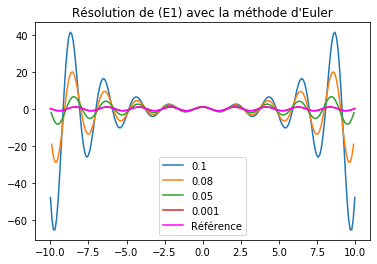

In [5]:
def x(t):
    return (np.cos(3*t))

def g(t, x):
    return np.array((x[1], -9*x[0]))

pas = [0.1, 0.08, 0.05, 0.001]

for dt in pas:
    T,Y = solve_euler_explicit(g, 0,(1,0), dt,-10,10)
    plt.plot(T,Y,label=f"{dt}")

Y0 = [x(t) for t in T]

plt.plot(T,Y0, color="magenta", label="Référence")
plt.title("Résolution de (E1) avec la méthode d'Euler")

plt.legend()
plt.show()


* *Exemple 2*

On résoud l'équation différentielle $(E_{2}) : y^{'}=y^{2}$ avec pour condition initiale $y (1) = -1.5$. 
Elle a pour solution $x \mapsto \frac{1}{\frac{1}{3}-x}$



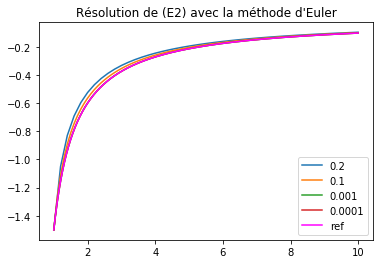

In [52]:

def x3(t):
    return (1/((1/3)-t))

def g3(t,x):
    return np.array((x[0]**2))



pas = [0.2,0.1,0.001,0.0001]


for dt in pas:
    T,Y = solve_euler_explicit(g3, 1,[-3/2], dt,1,10)
    plt.plot(T,Y,label = f"{dt}")

Y0 = [x3(t) for t in T]

plt.plot(T,Y0,label="ref", color="magenta")
plt.title("Résolution de (E2) avec la méthode d'Euler")
plt.legend()
plt.show()

* *Exemple 3*

On résoud l'équation différentielle $(E_{3}) : y^{'}+ y = \frac{1}{1+e^{x}}$ avec pour condition initiale $y(0) = 0$.

Elle a pour solution $x \mapsto e^{-x}*ln(\frac{1+e^{x}}{2})$.

On remarque qu'avec le schéma d'Euler, on surestime la solution.

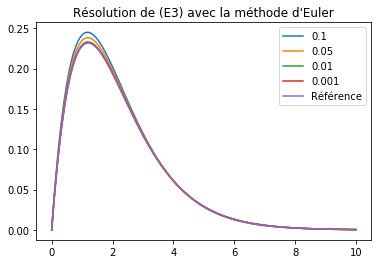

In [51]:
def x2(t):
    return (log(1+exp(t))*exp(-t)-log(2)*exp(-t))

def g2(t,x):
    return np.array((1/(1+exp(t)))-x[0])


pas = [0.1,0.05,0.01,0.001]


for dt in pas:
    T,Y = solve_euler_explicit(g2, 0,[0], dt,0,10)
    plt.plot(T,Y,label=f"{dt}")

Y0 = [x2(t) for t in T]

plt.plot(T,Y0,label="Référence")
plt.title("Résolution de (E3) avec la méthode d'Euler")
plt.legend()
plt.show()

* **La méthode de Heun - *schéma d'ordre 2***

On a codé un solveur utilisant la méthode de Heun, qui est d'ordre 2. On connait la condition initiale en un instant $t_{0}$. Cette fois, on résout l'équation différentielle à partir de $t_{0}$ jusqu'à un temps $t_{f}$.

In [15]:

def solve_heun_explicit(f,x0,dt,t0,tf):

    T = [t0]
    Y = [x0[0]]

    def heun(T,Y,X,dt,tf):
        X = np.array(X)
        while abs(tf-T[-1]) >= dt:
            X1 = X + dt*f(T[-1],X)
            X = X + 0.5*dt*(f(T[-1],X) + f(T[-1]+dt,X1))

            T.append(T[-1]+dt)
            Y.append(X[0])
        return T,Y

    T,Y = heun(T,Y,x0,dt,tf)

    return T,Y

* Illustration de la convergence - *Exemple 1*

On reprend l'équation différentielle $(E_{1})$ par un schéma d'Euler. On remarque que les solutions divergent moins vite, même avec un pas important.

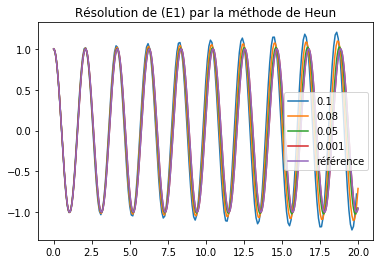

In [16]:

pas = [0.1, 0.08, 0.05, 0.001]

for dt in pas:
    T,Y = solve_heun_explicit(g, (1,0), dt,0,20)
    plt.plot(T,Y,label=f"{dt}")

Y0 = [x(t) for t in T]

plt.plot(T,Y0, label="référence")
plt.title("Résolution de (E1) par la méthode de Heun")
plt.legend()
plt.show()


* *Exemple 2*

On résoud l'équation différentielle $(E_{2}) : y^{'}=y^{2}$ avec pour condition initiale $y (1) = -1.5$. 
Elle a pour solution $x \mapsto \frac{1}{\frac{1}{3}-x}$

Comme pour l'exemple précédent, les solutions approchées convergent plus vite vers la solution exacte.

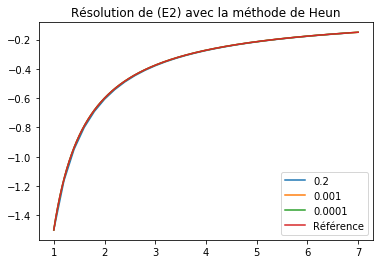

In [24]:
pas = [0.2,0.001,0.0001]


for dt in pas:
    T,Y = solve_heun_explicit(g3, [-3/2], dt,1,7)
    plt.plot(T,Y,label = f"{dt}")

Y0 = [x3(t) for t in T]

plt.plot(T,Y0,label="Référence")
plt.title("Résolution de (E2) avec la méthode de Heun")
plt.legend()
plt.show()

* *Exemple 3*

On résoud l'équation différentielle $(E_{3}) : y^{'}-y^{2} = 1$ avec pour condition initiale $y(0) = 0$.

Elle a pour solution $x \mapsto tan(x)$.

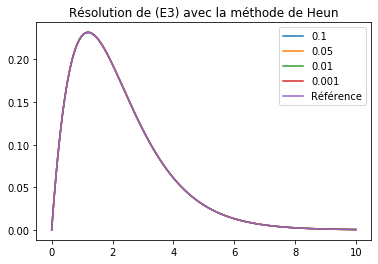

In [19]:
def x2(t):
    return (log(1+exp(t))*exp(-t)-log(2)*exp(-t))

def g2(t,x):
    return np.array((1/(1+exp(t)))-x[0])


pas = [0.1,0.05,0.01,0.001]


for dt in pas:
    T,Y = solve_heun_explicit(g2, [0], dt,0,10)
    plt.plot(T,Y,label=f"{dt}")

Y0 = [x2(t) for t in T]

plt.plot(T,Y0,label="Référence")
plt.title("Résolution de (E3) avec la méthode de Heun")
plt.legend()

* **Comparaison de la méthode d'Euler et de la méthode de Heun.**

On cherche à illustrer l'ordre de convergence des deux schémas étudiés.

On note $x^{j}$ l'approximation de $x(t_{j})$ calculée à l'instant $t_{j}$. 

Pour un schéma convergent à l'ordre $p$, on doit avoir $\max _ { 1 \leq j \leq J } \left\| x ^ { j } - x \left( t _ { j } \right) \right\| \leq c _ { v } ( \Delta t ) ^ { p }$.

Donc $log(\max _ { 1 \leq j \leq J } \left\| x ^ { j } - x \left( t _ { j } \right) \right\|) \leq log(c _ { v }) + p*log( \Delta t )$.


On vérifie cette propriété pour le schéma d'Euler ($p = 1$) et le schéma de Heun ($p = 2$).

On s'appuie sur $(E_{1}): y^{\prime \prime} + 9y=0$ avec pour conditions initiales $\left\{ \begin{array} { l } { y ( 0 ) = 1 } \\ { y ^ { \prime } ( 0 ) = 0 } \end{array} \right.$.

On calcule pour des pas allant de $10^{-2}$ à $10^{-4}$ l'erreur maximale commise.

On trace ensuite $log(\max _ { 1 \leq j \leq J } \left\| x ^ { j } - x \left( t _ { j } \right) \right\|)$ en fonction de $log(\Delta t)$ : on devrait obtenir une droite de pente $p$.

On utilise le module sklearn.linear_model qui permet de calculer les régressions linéaires des deux courbes obtenues. On obtient bien, approximativement, des pentes $p \approx 1$ pour Euler et $p \approx 2$ pour Heun.



Régression linéaire pour le schéma d'Euler : y : a1*x + b1
a1 = 1.056551520857098
b1 = 4.175057050202313 

Régression linéaire pour le schéma de Heun : y : a2*x + b2
a2 =  2.000164916231758
b2 = 3.8033205475191716


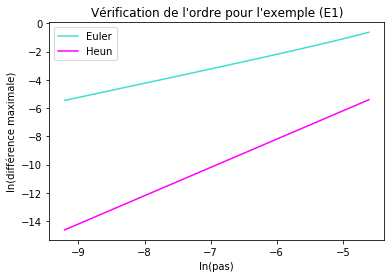

In [21]:

pas = np.linspace(10**(-4),10**(-2),35)

max_euler = []
max_heun = []

for dt in pas:
    T,Y = solve_euler_explicit(g, 0,(1,0), dt,0,10)
    difference_euler = [abs((x(T[i])-Y[i])) for i in range(len(T))]
    m_euler = max(difference_euler)
    max_euler.append(m_euler)
    
    T1,Y1 = solve_heun_explicit(g, (1,0), dt,0,10)
    difference_heun = [abs((x(T1[i])-Y1[i])) for i in range(len(T1))]
    m_heun = max(difference_heun)
    max_heun.append(m_heun)
    
log_pas = np.log(np.array(pas))
log_euler = np.log(np.array(max_euler))
log_heun = np.log(np.array(max_heun))

plt.plot(log_pas,log_euler,label="Euler",color="turquoise")
plt.plot(log_pas,log_heun,label="Heun",color="magenta")


from sklearn.linear_model import LinearRegression

new_model = LinearRegression().fit(log_pas.reshape((-1,1)), log_euler.reshape((-1, 1)))


a1,b1 = float(new_model.coef_),float(new_model.intercept_)
print(f"Régression linéaire pour le schéma d'Euler : y : a1*x + b1")
print(f"a1 = {a1}")
print(f"b1 = {b1} \n")

new_model2 = LinearRegression().fit(log_pas.reshape((-1,1)), log_heun.reshape((-1, 1)))


a2,b2 = float(new_model2.coef_),float(new_model2.intercept_)
print(f"Régression linéaire pour le schéma de Heun : y : a2*x + b2")
print("a2 = ",a2)
print(f"b2 = {b2}")

plt.xlabel('ln(pas)')
plt.ylabel('ln(différence maximale)')
plt.title("Vérification de l'ordre pour l'exemple (E1)")
plt.legend()
plt.show()

On reprend  $(E_{3}) : y^{'}+ y = \frac{1}{1+e^{x}}$

On vérifie comme précédemment l'ordre des schéma d'Euler et de Heun. On retrouve les mêmes résultats.

Régression linéaire pour le schéma d'Euler : y : a1*x + b1
a1 = 1.0059939956731436
b1 = -1.9755986554779814 

Régression linéaire pour le schéma de Heun : y : a2*x + b2
a2 =  2.0126904214997867
b2 = -3.0975421772369742


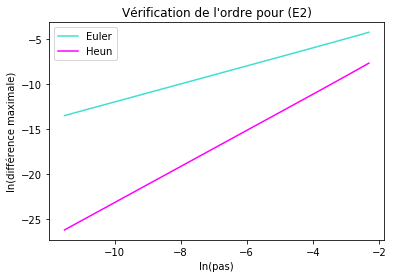

In [27]:

pas = np.linspace(10**(-5),10**(-1),35)

max_euler = []
max_heun = []

for dt in pas:
    T,Y = solve_euler_explicit(g2, 0,[0], dt,0,10)
    difference_euler = [abs((x2(T[i])-Y[i])) for i in range(len(T))]
    m_euler = max(difference_euler)
    max_euler.append(m_euler)
    
    T1,Y1 = solve_heun_explicit(g2, [0], dt,0,10)
    difference_heun = [abs((x2(T1[i])-Y1[i])) for i in range(len(T1))]
    m_heun = max(difference_heun)
    max_heun.append(m_heun)
    
log_pas = np.log(np.array(pas))
log_euler = np.log(np.array(max_euler))
log_heun = np.log(np.array(max_heun))

plt.plot(log_pas,log_euler,label="Euler",color="turquoise")
plt.plot(log_pas,log_heun,label="Heun",color="magenta")


from sklearn.linear_model import LinearRegression

new_model = LinearRegression().fit(log_pas.reshape((-1,1)), log_euler.reshape((-1, 1)))


a1,b1 = float(new_model.coef_),float(new_model.intercept_)
print(f"Régression linéaire pour le schéma d'Euler : y : a1*x + b1")
print(f"a1 = {a1}")
print(f"b1 = {b1} \n")

new_model2 = LinearRegression().fit(log_pas.reshape((-1,1)), log_heun.reshape((-1, 1)))


a2,b2 = float(new_model2.coef_),float(new_model2.intercept_)
print(f"Régression linéaire pour le schéma de Heun : y : a2*x + b2")
print("a2 = ",a2)
print(f"b2 = {b2}")

plt.xlabel('ln(pas)')
plt.ylabel('ln(différence maximale)')
plt.title("Vérification de l'ordre pour (E2)")
plt.legend()
plt.show()


Pas variable
---------
* **Question 1**

$e^{j+1}= x^{j} +\int_{t_{j}}^{t^{j+1}} f(s,x(s))  ds  -x^{j+1}$

$e^{j+1}= x^{j} +\int_{t_{j}}^{t^{j+1}} \dot{x}(s)  ds  -x^{j+1}$

$e^{j+1}= (x(t_{j+1})-x(t_{j})) - (x^{j+1} - x^{j})$

Or $x(t_{j+1})-x(t_{j}) = \Delta t_{j} f(t_{j},x(t_{j}))+\frac{(\Delta t)^{2}}{2}\frac{df(t,x(t))}{dt}(t_{j},x(t_{j}))+O((\Delta t)^{3})$

et pour un schéma d'Euler explicite, $x^{j+1} - x^{j} = \Delta t_{j} f(t_{j},x^{j})$

Donc on a approximativement $x^{j+1} - x^{j} = \Delta t_{j} f(t_{j},x(t_{j}))$ car $x^{j}=x(t_{j}) + O(\Delta t)$

En remplaçant dans la première expression, on obtient :

$e^{j+1} = \frac{(\Delta t)^{2}}{2} \frac{df(t,x(t))}{dt}(t_{j},x(t_{j}))+O((\Delta t)^{3})$

De plus,

$f(t_{j+1},x^{j+1}) = f(t_{j},x^{j}) + df(t_{j},x^{j})\begin{bmatrix} t_{j+1}-t_{j}
\\ 
x^{j+1}-x^{j}
\end{bmatrix} + O(\left \| \Delta t_{j})^{2} \right \|)$

$f(t_{j+1},x^{j+1}) - f(t_{j},x^{j}) = (t_{j+1}-t_{j})\frac{df}{dt}(t_{j},x^{j})+(x^{j+1}-x^{j})\frac{df}{dx}(t_{j},x^{j}) + O(\left \| \Delta t_{j})^{2} \right \|)$

$f(t_{j+1},x^{j+1}) - f(t_{j},x^{j}) = \Delta t_{j}\frac{df}{dt}(t_{j},x^{j})+ O(\left \| \Delta t_{j})^{2} \right \|)$

Donc on obtient 

$\frac {\Delta t_{j}}{2} (f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})) = \frac {(\Delta t)^{2}}{2}\frac{df}{dt}(t_{j},x^{j})+ O(\left \| \Delta t_{j})^{2} \right \|)$

Finalement,

$\left \| e^{j+1} \right \|= \left \| \frac {\Delta t_{j}}{2} (f(t_{j+1},x^{j+1}) - f(t_{j},x^{j})) \right \| + O((\Delta t)^{3})$


* **La méthode d'Euler explicite à pas variable - *Explication du code fourni***

In [29]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6): #ligne 1
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax #ligne 5
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next) #ligne 10
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2: #ligne 15
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next]) #ligne 20
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

**Principe général de l'algorithme :**

En sortie, on obtient un tableau ts d'instants $t_{j}$ et un tableau avec les valeurs que prend la fonction pour chacun de ces instants. Les $t_{j}$ sont régulièrement espacés d'une durée dtmax, le pas maximum. Mais entre deux points enregistrés en $t_{j}$ et $t_{j+1}$, l'algorithme calcule plusieurs autres points espacés d'un pas variable (compris entre $dtmin$ et $dtmax$). Ceci assure une plus grande précision.

* **ligne 7 :**  la boucle while assure que l'on calcule une solution jusqu'à l'instant $t_f$. Le tableau ts donne tous les instants $t_{j}$ de $t0$ à $t_f$ où a été calculée une valeur de la solution $f(t_{j})$ qui sera renvoyée en sortie dans le tableau xs.T.

* **ligne 8 :**  $ti$ représente la durée entre le dernier point enregistré dans $ts$, calculé en $ts[-1]$ et le dernier point calculé en $ts[-1]+ti$. La boucle while assure qu'on ne calcule des points qu'entre les instants $ts[-1]$ et $ts[-1] + dtmax$.

* **ligne 9 :**  on augmente les temps $t$ et $ti$ du pas $dt$, on calcule la nouvelle valeur de $x next$ par le schéma d'Euler explicite.

* **ligne 10 :** on calcule par le schéma d'Euler $x back$ à partir de $x next$ (avec un temps négatif, comme si on retournait en arrière). $x back$ pourra ensuite être comparé à $x$ : si ils sont très différents, il faut diminuer le pas car l'erreur commise est importante.

* **ligne 11 :** on calcule le ratio (déterminé à la question précédente) par lequel on va multiplier $dt$ pour obtenir le nouveau pas.

* **ligne 12 :** calcul du nouveau pas

* **ligne 13 :** on lève une erreur si le pas calculé est plus petit que le pas minimum

* **ligne 15 :** le pas calculé ne peut pas être supérieur ou égal à $0.5*dtmax$

* **ligne 18 :** une fois sortis de la boucle, on calcule le temps restant avant d'atteindre $ts[-1] + dtmax$, appelé $dt2DT$. 

* **ligne 19 :** on calcule la nouvelle valeur de $t$ : $t = ts[-1] + dtmax$ puis la nouvelle valeur de $x$ avec le schéma d'Euler. La valeur $ti$ est remise à zéro.

* **ligne 20 et 21 :** on enregistre la dernière valeur du temps dans $ts$ et de $x$ dans $xs$.

* **ligne 23 :** on return le tableau des temps $ts$ et des x $xs$



**Illustration du comportement de l'algorithme**

Nous avons légèrement modifié l'algorithme précédent pour qu'il retourne *tous* les points calculés et pas seulement ceux espacés de $dtmax$.
Nous l'avons appliqué à l'exemple fourni de l'oscillateur harmonique.
On trace ensuite le nuage de points : on remarque que beaucoup plus de points sont calculés aux "sommets" de la courbe, là où sa valeur change rapidement et où sa dérivée change de signe.

*Remarque : pour que la courbe reste lisible, on n'affiche qu'un point sur 60.*

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns

def solve_ivp_euler_explicit_variable_step_modifie(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6): #ligne 1
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax #ligne 5
    x = x0
    T=[t0]
    XS=[x0]
    while ts[-1] < t_f:
        while ti < dtmax:
            T.append(t)
            XS.append(x)
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next) #ligne 10
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2: #ligne 15
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        T.append(t_next)
        XS.append(x_next)
        ts = vstack([ts,t_next]) #ligne 20
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (T, array(XS).T)
    

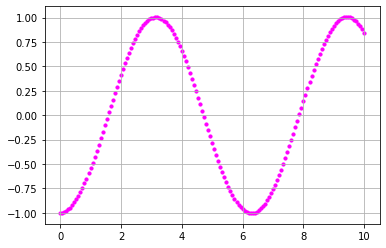

In [42]:
omega = 1

def f(xy):
    x, y = xy
    return array([y, -omega*x])

t0, tf, x0 = 0.0, 10.0, array([-1.0, 0.0])

temps, x = solve_ivp_euler_explicit_variable_step_modifie(f, t0, x0, tf,0.0001)

figure()
scatter(temps[::60], x[0][::60],s=10,color="magenta")
grid(True)
plt.show()

On peut également appliquer l'algorithme à l'équation différentielle $(E3)$.

*Remarque : l'algorithme a été légèrement modifié pour fonctionner avec la fonction $g2$.*

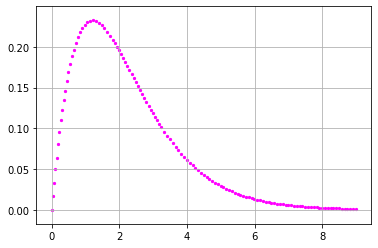

In [48]:
def solve_ivp_euler_explicit_variable_step_modifie2(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6): #ligne 1
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax #ligne 5
    x = x0
    T=[t0]
    XS=[x0]
    while ts[-1] < t_f:
        while ti < dtmax:
            T.append(t)
            XS.append(x)
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t,x)
            x_back = x_next - dt * f(t,x_next) #ligne 10
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2: #ligne 15
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t,x)
        T.append(t_next)
        XS.append(x_next)
        ts = vstack([ts,t_next]) #ligne 20
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (T, array(XS).T)

def g2(t,x):
                                                         
    return np.array((1/(1+exp(t)))-x                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            )


t, x = solve_ivp_euler_explicit_variable_step_modifie2(g2, 0, [0], 9,0.0001)
figure()
scatter(t[::25], x[0][::25],s=5,color="magenta")
grid(True)
plt.show()